# Pre-Model EDA

### Load in the data from s3

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-poster')

In [4]:
# Load in data: df
df = pd.read_csv('https://s3.amazonaws.com/clcarverloans/data/df_cleaned.csv', nrows=5)

In [6]:
# Remove usesless rows: df_select
cols = ['Borrower_Genders', 'Country Code', 'Loan Amount', 'Lender_Term',
       'Repayment_Interval', 'Distribution_Model', 'Sector', 'Activity','Use','Delinquent']
df_select = df[cols]

In [16]:
df_select.head()

,Borrower_Genders,Country Code,Loan Amount,Lender_Term,Repayment_Interval,Distribution_Model,Sector,Activity,Use,Delinquent
0,female,PH,1075,7.0,monthly,field_partner,Housing,Personal Housing Expenses,To purchase construction materials and labor f...,False
1,male,AF,1075,14.0,monthly,field_partner,Construction,Construction,to buy construction materials,False
2,male,AF,1075,14.0,monthly,field_partner,Construction,Construction,to purchase construction materials,False
3,group,AF,425,10.0,monthly,field_partner,Services,Services,to expand and resupply three small businesses,False
4,group,AF,850,12.0,monthly,field_partner,Services,Services,to expand four small businesses,False


### EDA

In [14]:
# Create function to convert colors: rgb_colors
def rgb_color(r,g,b):
    r = r/255.
    g = g/255.
    b = b/255.
    return(r,g,b)

# Create colors:
tableau_blue = rgb_color(31,119,180)
dark_blue = '#092334'
orange = '#CB6B48'
grey = '#C7C7C7'

In [1]:
# Breakdown by Gender

# Group and sort:
gender_groups = df.groupby('Borrower_Genders')['Id'].count()
groups_sorted = gender_groups.sort_values(ascending=False)
female_pct = int(round((df.groupby('Borrower_Genders')['Id'].count()['female']/len(df))*100, 0))

# Create plot
ax = groups_sorted.plot(kind='bar')
for bar in ax.patches:
    bar.set_facecolor(color=rgb_color(127,127,127)) # Set all to grey
ax.patches[0].set_facecolor(rgb_color(31,119,180)) # highlight first with blue
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(tableau_grey) 
ax.spines['left'].set_color(tableau_grey)
ax.axes.get_yaxis().set_ticks([])
plt.xlabel('')
plt.margins(0.2)
plt.text(0,48000, str(female_pct)+'%', horizontalalignment='center', color='w', size=14, weight='bold')
plt.xticks(range(3), ['Female', 'Male', 'Group'], rotation='horizontal')
plt.ylabel('Percent of Total Borrowers')
plt.title('Borrower Gender by Percent of Total')
plt.savefig('../pictures/borrowers_by_gender.png', transparent=True, bbox_inches='tight')
plt.show()

NameError: name 'df' is not defined

In [15]:
default_sector = sorted(df.groupby('Sector').sum()['Delinquent']/df.groupby('Sector').count()['Delinquent'], reverse=False)
sector_list = (df.groupby('Sector').sum()['Delinquent']/df.groupby('Sector').count()['Delinquent']).index[np.argsort(default_sector)]
default_by_sector = pd.DataFrame({'Sector': sector_list, 'Default_pct': default_sector})
default_by_sector.set_index('Sector', inplace=True)

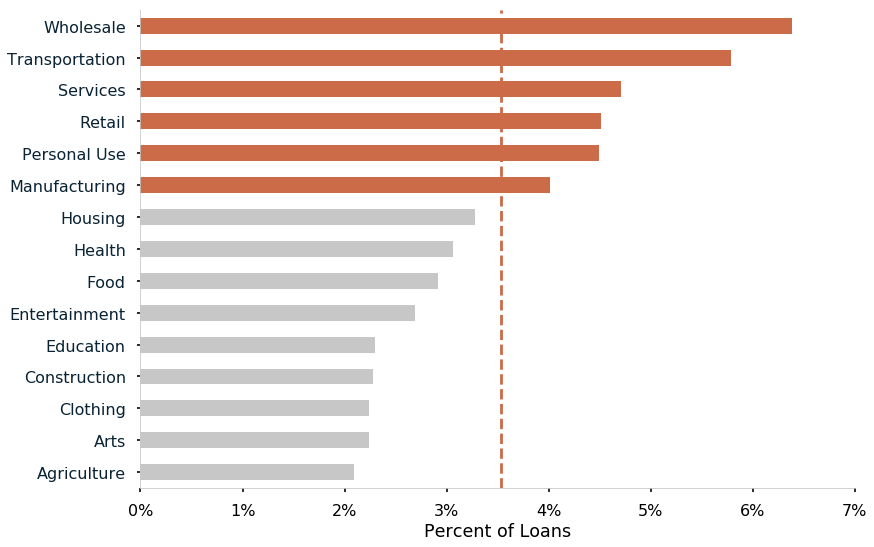

In [33]:
ax = default_by_sector.plot(kind='barh', legend=False)
plt.axvline(default_by_sector['Default_pct'].mean(), color=orange, linestyle='--')
for bar in ax.patches:
    bar.set_facecolor(color=grey) # Set all to grey
for bar in range(-6,0): 
    ax.patches[bar].set_facecolor(orange) # highlight those above average with blue
labels=[str(int(round(label*100)))+'%' for label in np.arange(0,0.08,0.01)]    
plt.ylabel('')
plt.xlabel('Percent of Loans')
plt.xticks(np.arange(0,0.08, 0.01), labels)
plt.yticks(color=dark_blue)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(grey) 
ax.spines['left'].set_color(grey)
plt.savefig('../pictures/defaults_by_sector.png', dpi=400, transparent=True, bbox_inches='tight')

In [20]:
default_by_country = pd.DataFrame(df.groupby('Country').sum()['Delinquent']/df.groupby('Country').count()['Delinquent']).sort_values('Delinquent')
best_countries = default_by_country.iloc[:5]
worst_countries = default_by_country.iloc[-5:]

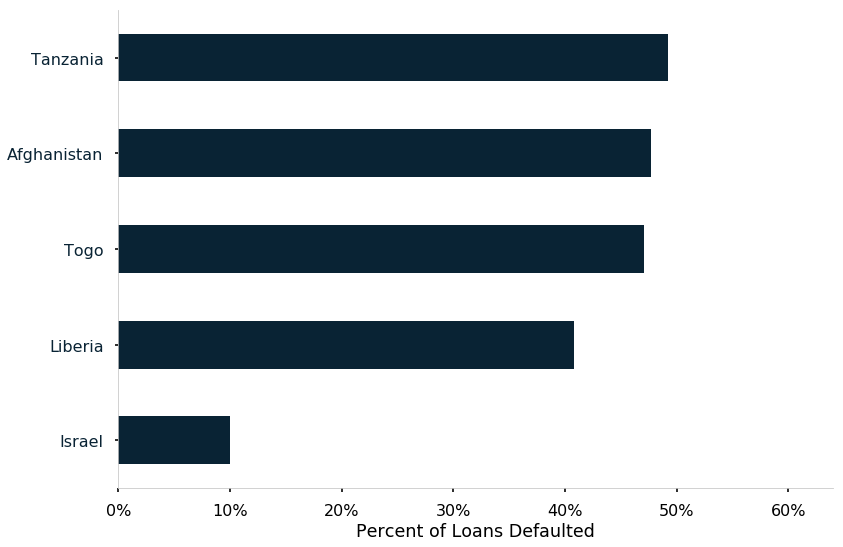

In [32]:
ax = worst_countries.plot(kind='barh', legend=False, color=dark_blue)
plt.margins(0.3)
plt.xlabel('')
plt.xlabel('Percent of Loans Defaulted')
plt.ylabel('')
labels=[str(int(round(label*100)))+'%' for label in np.arange(0,0.7,0.1)]
plt.xticks(np.arange(0,0.7,0.1),labels)
plt.yticks(color=dark_blue)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(grey) 
ax.spines['left'].set_color(grey)
plt.savefig('../pictures/defaults_worst_countries.png', dpi=400, transparent=True, bbox_inches='tight', orientation='landscape')
plt.show()

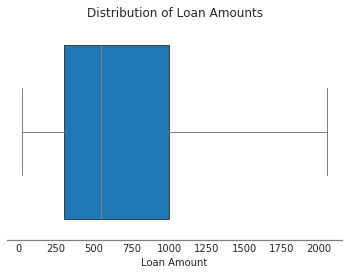

In [44]:
ax = sns.boxplot(x='Loan Amount', data=df, showfliers=False, color=tableau_blue, saturation=1, linewidth=1, whis=1.5)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(tableau_grey) 
ax.spines['left'].set_visible(False)
plt.setp(ax.lines, color=tableau_grey)
plt.title('Distribution of Loan Amounts')
plt.savefig('../pictures/distribution_loan_amounts.png', dpi=600, transparent=True, bbox_inches='tight', orientation='landscape')
plt.show()

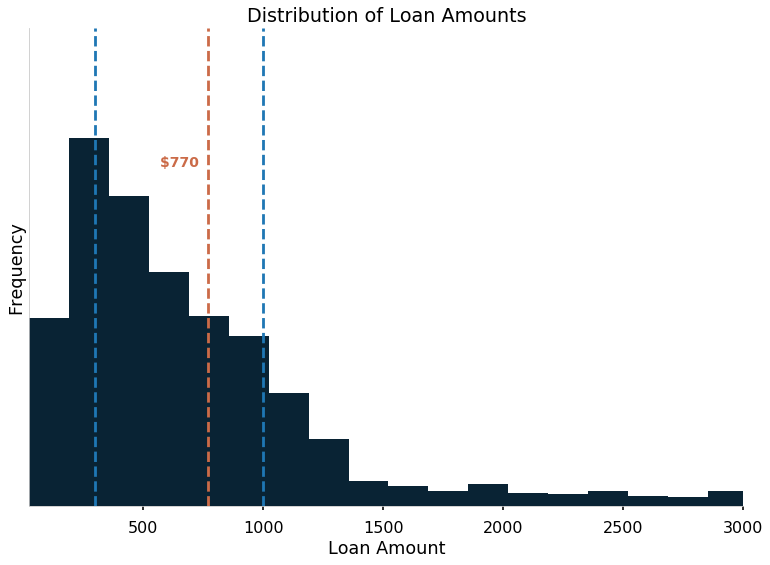

In [53]:
ax = df['Loan Amount'].plot(kind='hist', bins=60, color=dark_blue)
plt.margins(0.3)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(grey) 
ax.spines['left'].set_color(grey)
plt.xlabel('Loan Amount')
plt.axvline(df['Loan Amount'].mean(), color=orange, linestyle='--')
plt.title('Distribution of Loan Amounts')
plt.xlim(df['Loan Amount'].min(), 3000)
plt.text(df['Loan Amount'].mean(), 17000, '$770  ', horizontalalignment='right', color=orange, size=14, weight='bold')
ax.axes.get_yaxis().set_ticks([])
plt.axvline(np.percentile(df['Loan Amount'], 25), color=tableau_blue, linestyle='--')
plt.axvline(np.percentile(df['Loan Amount'], 75), color=tableau_blue, linestyle='--')
plt.savefig('../pictures/loan_amount_hist.png',  dpi=400, transparent=True, bbox_inches='tight', orientation='landscape')
plt.show()

In [23]:
default_by_gender = pd.DataFrame(df.groupby('Borrower_Genders').sum()['Delinquent']/df.groupby('Borrower_Genders').count()['Delinquent']).sort_values('Delinquent', ascending=False)

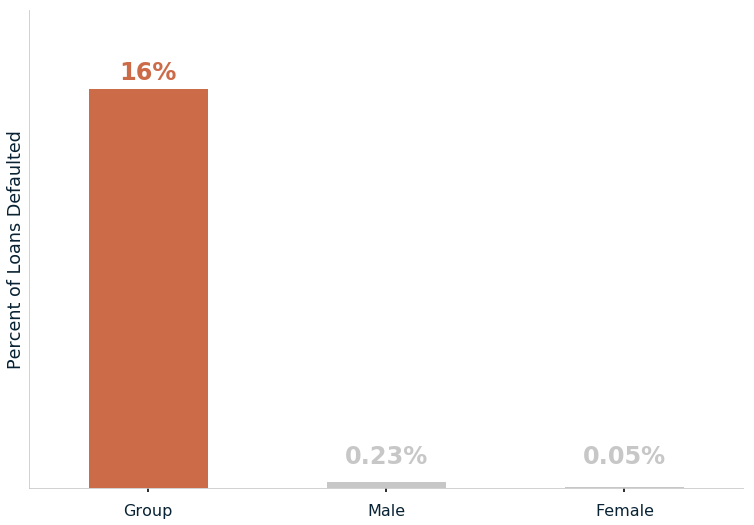

In [29]:
ax = default_by_gender.plot(kind='bar', legend=False)
for bar in ax.patches:
    bar.set_facecolor(color=grey) # Set all to grey
ax.patches[0].set_facecolor(orange) # highlight first with blue
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(grey) 
ax.spines['left'].set_color(grey)
ax.axes.get_yaxis().set_ticks([])
plt.text(0,0.165, str(int(default_by_gender.iloc[0,0]*100))+'%', horizontalalignment='center', color=orange, size=24, weight='bold')
plt.text(1,0.01, str(round(default_by_gender.iloc[1,0]*100, 2))+'%', horizontalalignment='center', color=grey, size=24, weight='bold')
plt.text(2,0.01, str(round(default_by_gender.iloc[2,0]*100, 2))+'%', horizontalalignment='center', color=grey, size=24, weight='bold')
plt.xlabel('')
plt.ylabel('Percent of Loans Defaulted', color=dark_blue)
plt.xticks(range(3), ['Group', 'Male', 'Female'], rotation='horizontal', color=dark_blue)
plt.savefig('../pictures/loan_default_gender.png', dpi=400, transparent=True, bbox_inches='tight', orientation='landscape')
plt.margins(0.2)

In [25]:
default_pct = df['Delinquent'].sum()/df['Delinquent'].count()
repayment_rate = 1 - default_pct

In [26]:
class_inbalance = [repayment_rate, default_pct]
class_inbalance_df = pd.DataFrame(class_inbalance)

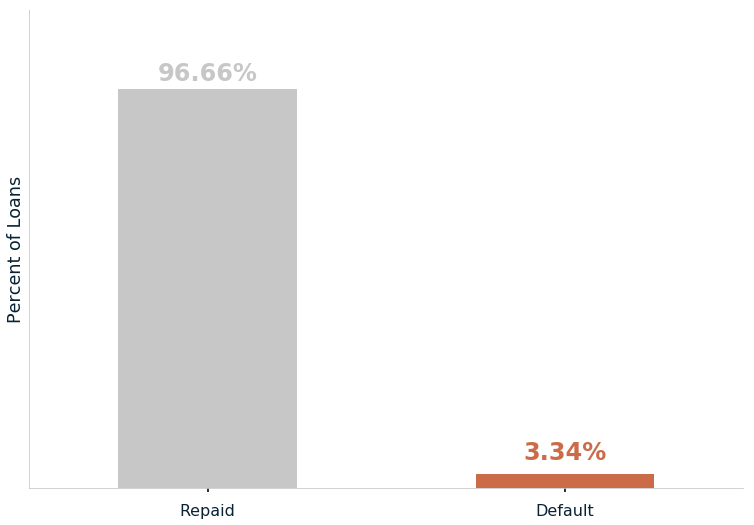

In [30]:
ax = class_inbalance_df.plot(kind='bar', legend=False)
for bar in ax.patches:
    bar.set_facecolor(color=grey) # Set all to grey
ax.patches[1].set_facecolor(orange) # highlight first with blue
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(grey) 
ax.spines['left'].set_color(grey)
ax.axes.get_yaxis().set_ticks([])
plt.xlabel('')
plt.ylabel('Percent of Loans', color=dark_blue)
plt.xticks(range(2), ['Repaid', 'Default'], rotation='horizontal', color=dark_blue)
plt.margins(0.2)
plt.text(0,0.99, str(round(class_inbalance[0]*100, 2))+'%', horizontalalignment='center', color=grey, size=24, weight='bold')
plt.text(1,0.07, str(round(class_inbalance[1]*100, 2))+'%', horizontalalignment='center', color=orange, size=24, weight='bold')
plt.savefig('../pictures/class_inbalance.png', dpi=400, transparent=True, bbox_inches='tight', orientation='landscape')